In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tweets = pd.read_csv('../../data/tweets.csv')

In [3]:
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [10]:
tweets.dropna(inplace=True)
tweets = tweets.drop(columns=['text'], axis=1)

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16363 entries, 1 to 27479
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         16363 non-null  object
 1   selected_text  16363 non-null  object
 2   sentiment      16363 non-null  object
dtypes: object(3)
memory usage: 511.3+ KB


<Axes: xlabel='sentiment', ylabel='count'>

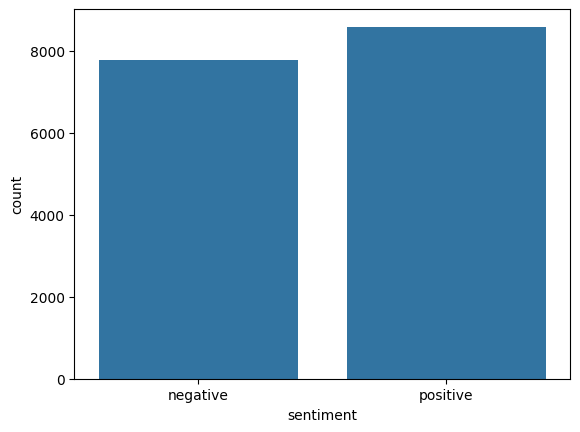

In [12]:
sns.countplot(data=tweets, x='sentiment')

In [13]:
tweets = tweets[tweets['sentiment'].isin(['positive', 'negative'])]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
cv = CountVectorizer()
X = cv.fit_transform(tweets['selected_text'])
encoder = LabelEncoder()
y = encoder.fit_transform(tweets['sentiment'])

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X.toarray(), y)


GaussianNB()

In [34]:
y_pred = model.predict(cv.transform(['i like it']).toarray())
encoder.inverse_transform(y_pred)

array(['positive'], dtype=object)